In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the data into the python environment

In [2]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


#### Describing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Year     112 non-null int64
Price    112 non-null int64
dtypes: int64(2)
memory usage: 1.8 KB


In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


#### Linear relationship between Year and Price

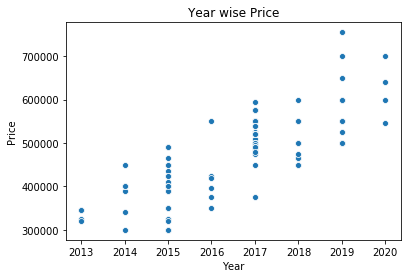

In [5]:
sns.scatterplot(x = "Year", y = "Price",data = data)
plt.title("Year wise Price")
plt.show()

In [6]:
data.corr()     # The correlation coefficient is 0.776302 between Year and Price. Which shows a high positive correlation between the variables. 

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


#### Visualizing the linear model

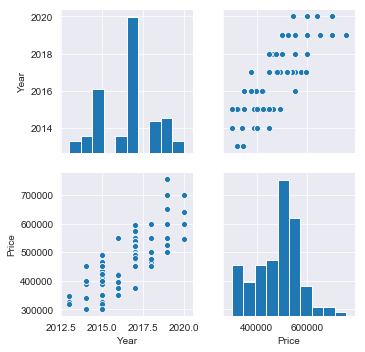

In [7]:
sns.set_style('darkgrid')
sns.pairplot(data)

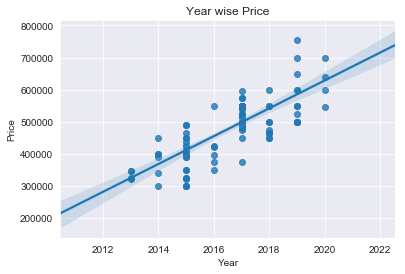

In [8]:
sns.regplot(x = "Year", y = "Price", data = data)
plt.title("Year wise Price")
plt.show()

In [9]:
X = data['Year']
y = data['Price']

In [10]:
# Reshaping the given data to our expected format to feed into the model

X = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

#### Dividing the dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=64)
print('X_train',X_train)
print('y_train is',y_train)

X_train [[2015]
 [2017]
 [2018]
 [2017]
 [2015]
 [2019]
 [2019]
 [2018]
 [2015]
 [2014]
 [2017]
 [2018]
 [2018]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2015]
 [2014]
 [2015]
 [2016]
 [2017]
 [2017]
 [2017]
 [2019]
 [2020]
 [2017]
 [2017]
 [2017]
 [2017]
 [2018]
 [2017]
 [2017]
 [2013]
 [2016]
 [2015]
 [2019]
 [2014]
 [2016]
 [2015]
 [2019]
 [2019]
 [2020]
 [2018]
 [2017]
 [2015]
 [2015]
 [2017]
 [2019]
 [2017]
 [2017]
 [2017]
 [2019]
 [2015]
 [2015]
 [2017]
 [2015]
 [2016]
 [2017]
 [2019]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2017]
 [2018]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2016]
 [2015]
 [2018]
 [2017]
 [2018]
 [2015]
 [2015]]
y_train is [[325000]
 [500000]
 [450000]
 [575000]
 [350000]
 [525000]
 [700000]
 [600000]
 [409999]
 [450000]
 [550000]
 [500000]
 [465000]
 [520000]
 [550000]
 [550000]
 [400000]
 [550000]
 [390000]
 [400000]
 [325000]
 [375000]
 [520000]
 [520000]
 [520000]
 [600000]
 [545000

#### Linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

####  Predicting the possible price of a 2022 model second-hand grand i10?

In [14]:
pred = regressor.predict([[2022]])
print('The possible price of a 2022 model second-hand grand i10 will be', pred)

The possible price of a 2022 model second-hand grand i10 will be [[703244.32733284]]


In [15]:
y_pred = regressor.predict(X_test)

#### Mean squared error

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('The MSE for this model prediction is', mse)        

The MSE for this model prediction is 4082323810.4957275


#### R squared value

In [17]:
from sklearn.metrics import r2_score
r_sqr = r2_score(y_test, y_pred)
print('The R squared value for the model is',r_sqr)     #  Since the R squared value is higher we can say that better the model fits the data.

The R squared value for the model is 0.7158743340539495


#### Lasso Regression Model

In [18]:
from sklearn.linear_model import Lasso

In [19]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)
print('The R squared value for the model is',r2_score)
mse = mean_squared_error(y_test, y_pred)
print('The MSE for this model prediction is', mse)

The R squared value for the model is <function r2_score at 0x0000023154BA86A8>
The MSE for this model prediction is 4082349965.0046096


#### Lasso regression is a modification of linear regression. If we have a large amount of features and in order to make the model more interpretable by reducing the numbers of features Lasso regression is the best choice. 

#### When compared to linear regression model the R squared value for Lasso regression is decreased in very small amount and the mean squared error is increased. So in this case Linear regression is performing better.